<a href="https://colab.research.google.com/github/Abhishek9895analyst/AB-s-Repo/blob/main/Hotel_Booking_Project_%5BAB's%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#what is the booking ratio b/w resort hotel and city hotel?
#how long people stay?comparison in b/w city and resort hotel?
#what are the various distribution channel for the hotel?
#dealing with missing and null values and drop it out
#optimal length of stay at best daily rate?
#What are the types of Market Segments in Hotel Bookings and How it varies?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
pd.options.mode.chained_assignment = None
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path= '/content/drive/MyDrive/Colab Notebooks/data/ Hotel Bookings.csv'
df= pd.read_csv(path)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

In [ ]:
#filling null values as 0.0 for agent and country
df[['agent', 'company']] =df[['agent', 'company']].fillna(0.0)
#replace missing values in country with mode
df['country'].fillna(df.country.mode().to_string(), inplace=True)
#replace missing value in children to the rounded mean
df['children'].fillna(round(df.children.mean()), inplace=True)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
#change the float type to int64 because of their actual values are integers.
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
#find out the observation where children adult and babies are zero.
df[(df.adults+df.children+df.babies)==0].shape

(180, 32)

In [ ]:
#so drop the rows which having zero observation
df= df.drop(df[(df.adults+df.children+df.babies)==0].index)
df.shape

(119210, 32)

In [ ]:
#making a count in cancellation of booking hotel for analyzing.
df_cancelled = df[df['is_canceled']!=0]
df_cancelled['hotel'].value_counts()
# df_cancelled.shape

City Hotel      33079
Resort Hotel    11120
Name: hotel, dtype: int64

In [ ]:
#making a count in not cancelled booking hotel for analyzation.
df_not_canceled = df[df['is_canceled'] == 0]
df_not_canceled['hotel'].value_counts()
# df_not_canceled

City Hotel      46084
Resort Hotel    28927
Name: hotel, dtype: int64

# **What is Hotel Booking Ratio between City Hotel and Resort Hotel?**

In [ ]:
#booking ratio b/w city hotel and resort hotel
hotel_ratio= df['hotel'].value_counts(normalize = True) *100
hotel_ratio

City Hotel      66.406342
Resort Hotel    33.593658
Name: hotel, dtype: float64

Text(0.5, 0, 'Hotels')

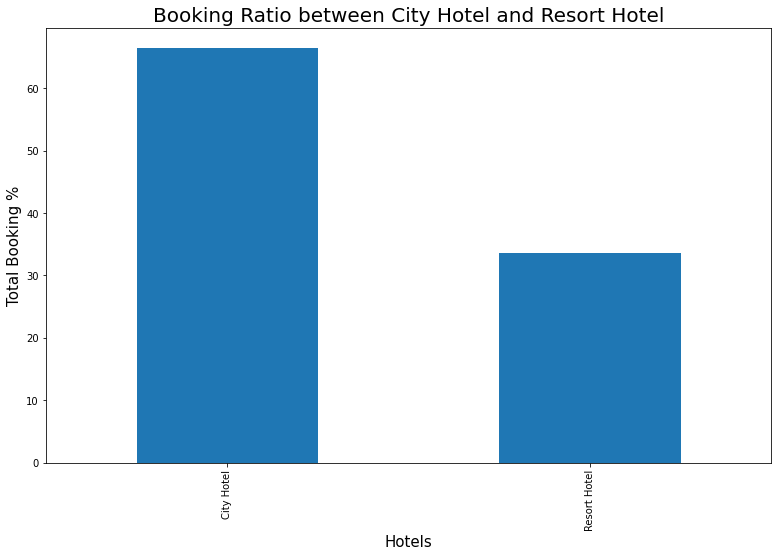

In [ ]:
hotel_ratio.plot(kind= 'bar', figsize=(13, 8))
plt.title('Booking Ratio between City Hotel and Resort Hotel',fontsize = 20)
plt.ylabel('Total Booking %' ,fontsize =15)
plt.xlabel('Hotels',fontsize =15)
#plt.rcParams['figure.figsize'] = (10, 5)

# **What is Hotel Booking Ratio between City Hotel and Resort Hotel?**

In [ ]:
#booking ratio b/w city hotel and resort hotel
hotel_ratio= df['hotel'].value_counts(normalize = True) *100
hotel_ratio

City Hotel      66.406342
Resort Hotel    33.593658
Name: hotel, dtype: float64

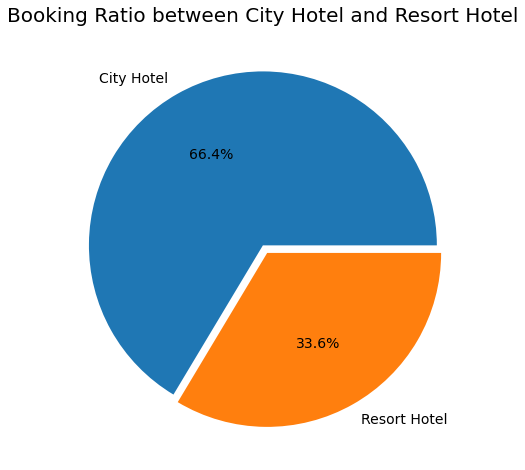

In [ ]:
#booking ratio b/w city hotel and resort hotel by pie chart
hotel_ratio.plot.pie(label="",autopct='%1.1f%%', figsize=(8, 8),explode=(0,0.05), textprops={'fontsize': 14})
plt.title("Booking Ratio between City Hotel and Resort Hotel",fontsize=20)
plt.show()

# **What are the various Distribution Channel in Hotel Bookings?**




In [ ]:
#find out the most rated distribution channel in hotelwise
distributon_chnl =df.groupby(['hotel','distribution_channel'])['hotel'].count() .unstack()
distributon_chnl

distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
hotel,,,,,
City Hotel,3386.0,6749.0,193.0,68831.0,4.0
Resort Hotel,3265.0,7862.0,NaN,28919.0,1.0


Text(0.5, 0, 'Hotels')

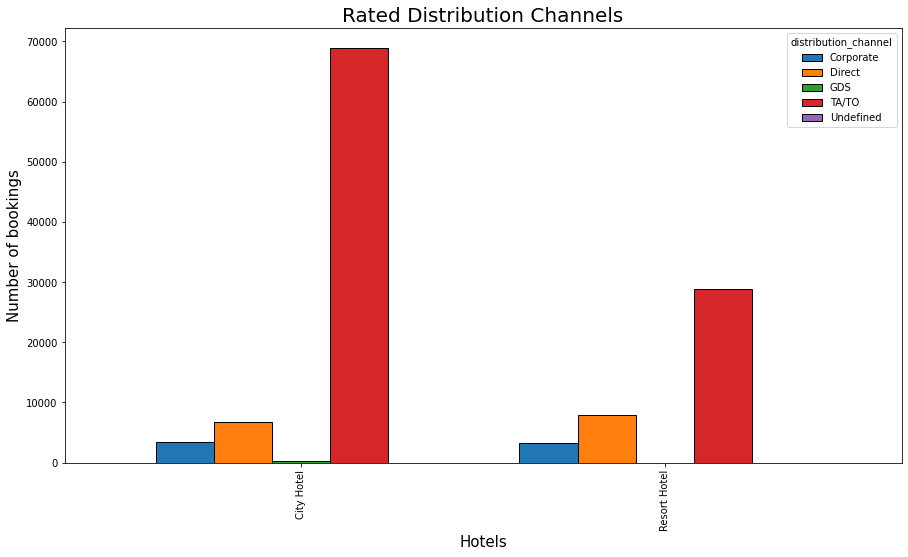

In [ ]:
distributon_chnl.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (15,8))

plt.title('Rated Distribution Channels' , fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.xlabel('Hotels', fontsize = 15)
#plt.rcParams['figure.figsize'] = (15, 10)

# **What are the types of Market Segments in Hotel Bookings and How it varies?**

Text(0.5, 0, 'Market Segments')

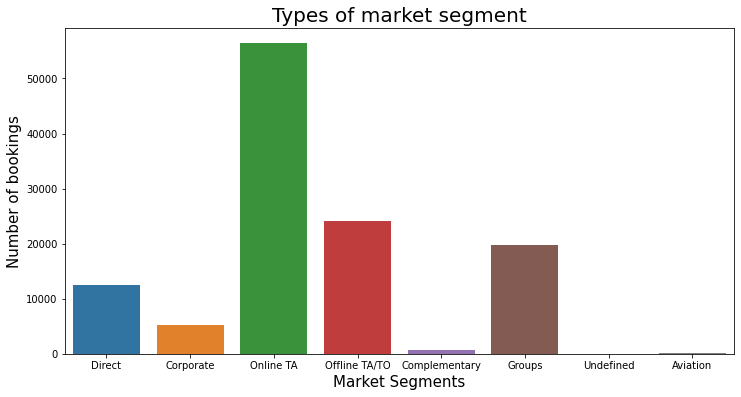

In [ ]:
#overall distribution of market segment in hotel booking
plt.figure(figsize=(12,6))
sns.countplot(data = df, x = 'market_segment')
plt.title('Types of market segment', fontsize = 20)
plt.ylabel('Number of bookings', fontsize = 15)
plt.xlabel('Market Segments', fontsize = 15)


# **How much Days to wait for a booking in different Market Segment?**

Text(0.5, 0, 'Market Segments')

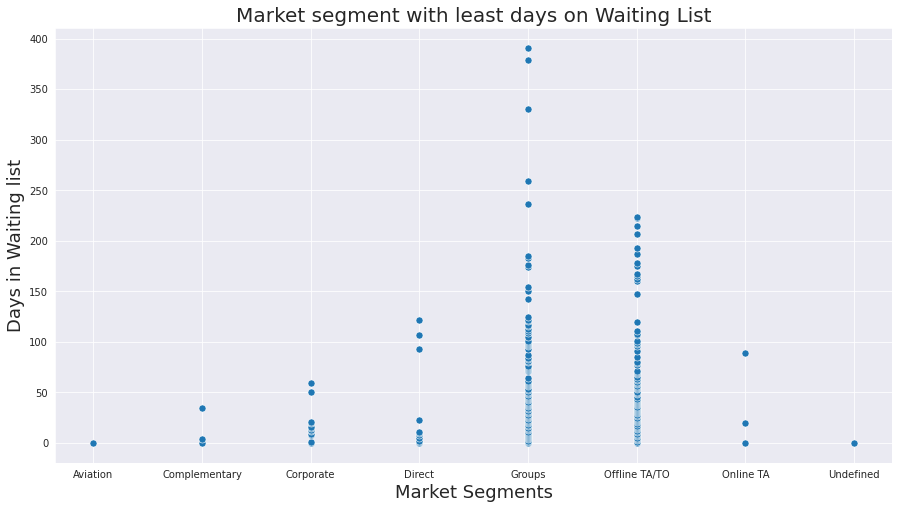

In [ ]:
#Groupby market segment and days in waiting list from whole dataset.
least_numb_wl = df.groupby(['market_segment','days_in_waiting_list']).sum().reset_index()
# making dataset which contain only both of them
least_numb_wl= least_numb_wl[['market_segment','days_in_waiting_list']]
least_numb_wl

# plotting them for finding the exact observation
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.scatterplot( data =least_numb_wl , x = 'market_segment', y = 'days_in_waiting_list' , s=50)
plt.title('Market segment with least days on Waiting List' , fontsize = 20)
plt.ylabel('Days in Waiting list', fontsize = 18)
plt.xlabel('Market Segments', fontsize = 18)

# **How long the People Stays in Hotel?**

In [ ]:
#how long people stay
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
pct= total_nights.value_counts(normalize=True)*100
#pct =total_nights.value_counts() / len(total_nights) *100

Text(0.5, 0, 'Number of nights')

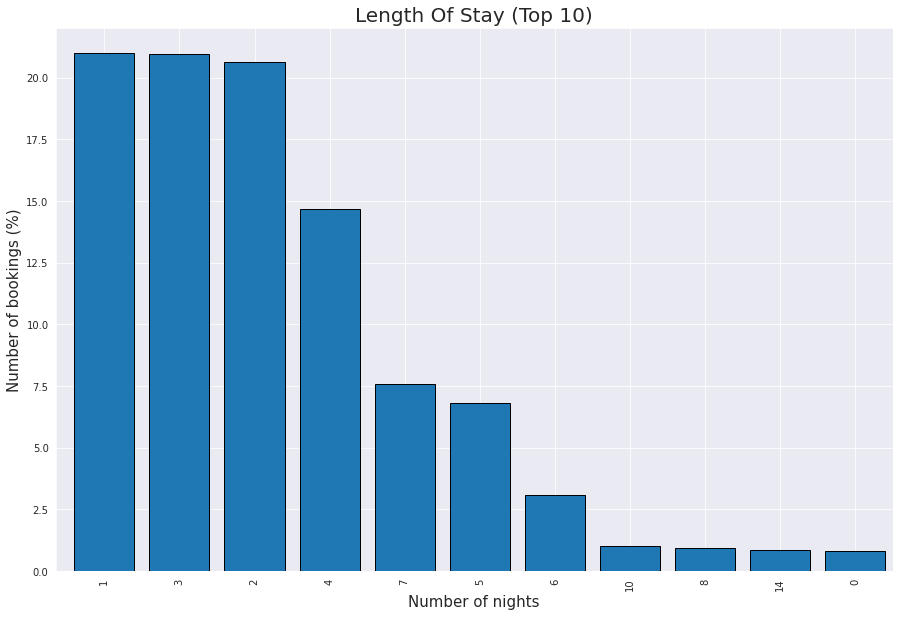

In [ ]:
pct.plot.bar(width=0.8,linewidth=1,edgecolor='black',figsize = (15,10))
plt.xlim(right=10.5)
plt.title('Length Of Stay (Top 10)' , fontsize = 20)
plt.ylabel('Number of bookings (%)', fontsize = 15)
plt.xlabel('Number of nights', fontsize = 15)
#plt.rcParams['figure.figsize'] = (15, 10)

# **How the Length of Stay differ in City Hotel and Resort Hotel?**

In [ ]:
# make a copy for dataframe for future purpose.
df= df.copy()

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
#import a new column of total nights stayed which helps to plot the graph by each hotel.
df_not_canceled[['total_nights']] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
# since is_canceled cloumn is full of null values, so dropping it.
df_not_canceled.drop('is_canceled',axis=1)


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,0,Transient,96.14,0,0,Check-Out,2017-09-06,7
119386,City Hotel,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,0,Transient,225.43,0,2,Check-Out,2017-09-07,7
119387,City Hotel,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,0,Transient,157.71,0,4,Check-Out,2017-09-07,7
119388,City Hotel,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,0,Transient,104.40,0,0,Check-Out,2017-09-07,7


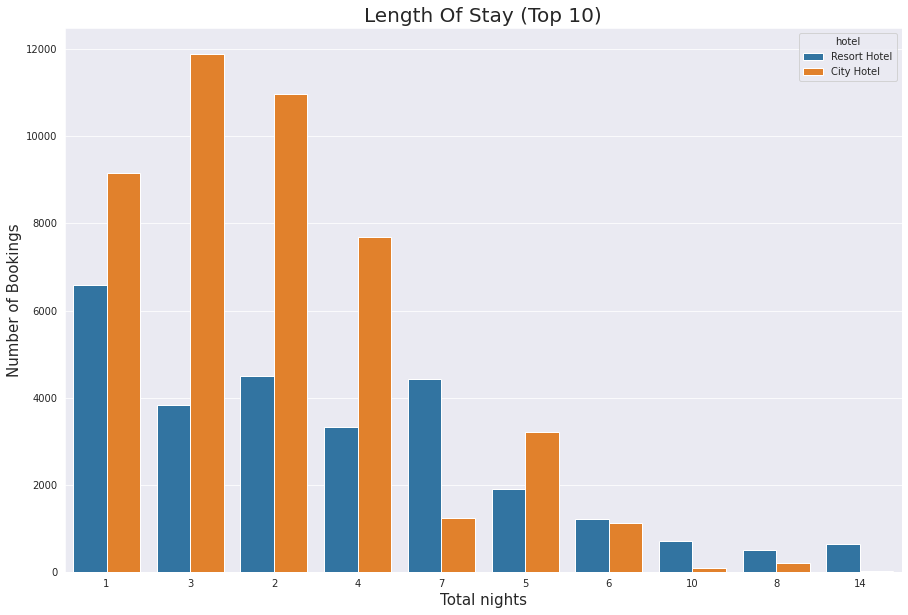

In [ ]:
#length of stay on hotel wise
plt.figure(figsize=(15,10))
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,order = df_not_canceled.total_nights.value_counts().iloc[:10].index)
plt.title('Length Of Stay (Top 10)' , fontsize = 20)
plt.ylabel('Number of Bookings', fontsize = 15)
plt.xlabel('Total nights', fontsize = 15)
#plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

# **What is the optimal Length of stay in order to get best Daily Rate ?**

In [ ]:
#sorting out the dataframe for resort hotel and city hotel with total nights of stay.
df_resort= df_not_canceled[df_not_canceled['hotel']== 'Resort Hotel'] + df_not_canceled[df_not_canceled['total_nights']>0]
df_city = df_not_canceled[df_not_canceled['hotel']== 'City Hotel'] + df_not_canceled[df_not_canceled['total_nights']>0]
#groupby the data with mean of avearge daily rate for both the hotels.
resort_hotel = df_resort.groupby(['total_nights'])['adr'].mean().reset_index()
city_hotel = df_city.groupby(['total_nights'])['adr'].mean().reset_index()
city_hotel

,total_nights,adr
0,2.0,210.972551
1,4.0,211.706568
2,6.0,215.106352
3,8.0,213.141981
4,10.0,214.491520
5,12.0,218.305743
6,14.0,217.431438
7,16.0,215.792195
8,18.0,226.100000
9,20.0,209.828500


In [ ]:
resort_hotel

,total_nights,adr
0,2.0,147.531142
1,4.0,178.592246
2,6.0,188.252900
3,8.0,191.281319
4,10.0,220.431943
5,12.0,241.224913
6,14.0,194.801894
7,16.0,214.413281
8,18.0,219.189657
9,20.0,203.438226


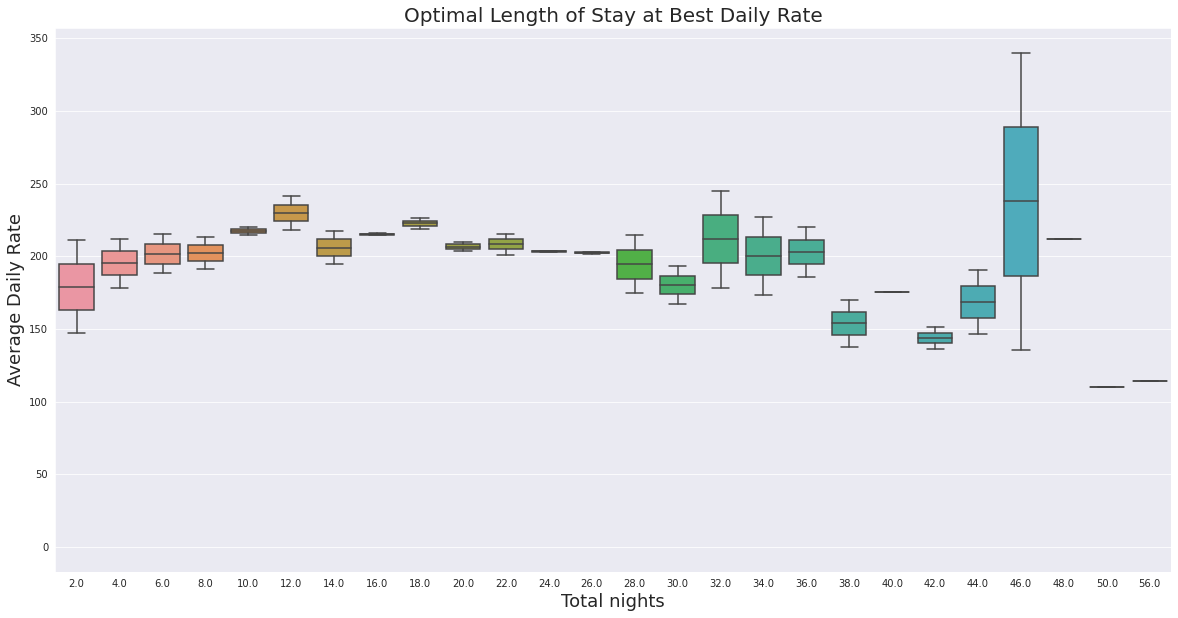

In [ ]:
#concatinating the dataframe for getting the best daily rate.
final =pd.concat([resort_hotel,city_hotel] ) 
final.groupby(['total_nights']).agg({'adr': 'mean'}).astype('int64')

sns.set_style("darkgrid")
plt.figure(figsize=(20,10))
sns.boxplot( data = final, x = 'total_nights', y = 'adr')
plt.xlim(right=25.5)
plt.title('Optimal Length of Stay at Best Daily Rate' , fontsize = 20)
plt.ylabel('Average Daily Rate', fontsize = 18)
plt.xlabel('Total nights', fontsize = 18)
plt.show()

# **Finding Correlation of each given Data and Analysed Data**

In [ ]:
#inserting a column total nights which gives us the length of stay.
df_cor = df.copy()
df_cor[['total_nights']] =  df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
#taking out the columns that we want to correlate.
corr_df =df_cor[['lead_time','adults','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled','booking_changes','adr','required_car_parking_spaces','total_of_special_requests', 'total_nights']]
corr_df =corr_df.corr()
corr_df.columns
corr_df

,lead_time,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_nights
lead_time,1.000000,0.117575,-0.123209,0.086025,-0.073599,0.002230,-0.065018,-0.116624,-0.095949,0.287223
adults,0.117575,1.000000,-0.140973,-0.007070,-0.108856,-0.041472,0.224253,0.014438,0.123353,0.157423
is_repeated_guest,-0.123209,-0.140973,1.000000,0.082740,0.420642,0.013044,-0.130807,0.077928,0.012963,-0.125093
previous_cancellations,0.086025,-0.007070,0.082740,1.000000,0.152570,-0.027261,-0.065974,-0.018540,-0.048488,-0.032502
previous_bookings_not_canceled,-0.073599,-0.108856,0.420642,0.152570,1.000000,0.011963,-0.072335,0.047506,0.037775,-0.063093
booking_changes,0.002230,-0.041472,0.013044,-0.027261,0.011963,1.000000,0.026601,0.067490,0.055003,0.091903
adr,-0.065018,0.224253,-0.130807,-0.065974,-0.072335,0.026601,1.000000,0.056510,0.172308,0.054800
required_car_parking_spaces,-0.116624,0.014438,0.077928,-0.018540,0.047506,0.067490,0.056510,1.000000,0.082718,-0.028467
total_of_special_requests,-0.095949,0.123353,0.012963,-0.048488,0.037775,0.055003,0.172308,0.082718,1.000000,0.070130
total_nights,0.287223,0.157423,-0.125093,-0.032502,-0.063093,0.091903,0.054800,-0.028467,0.070130,1.000000


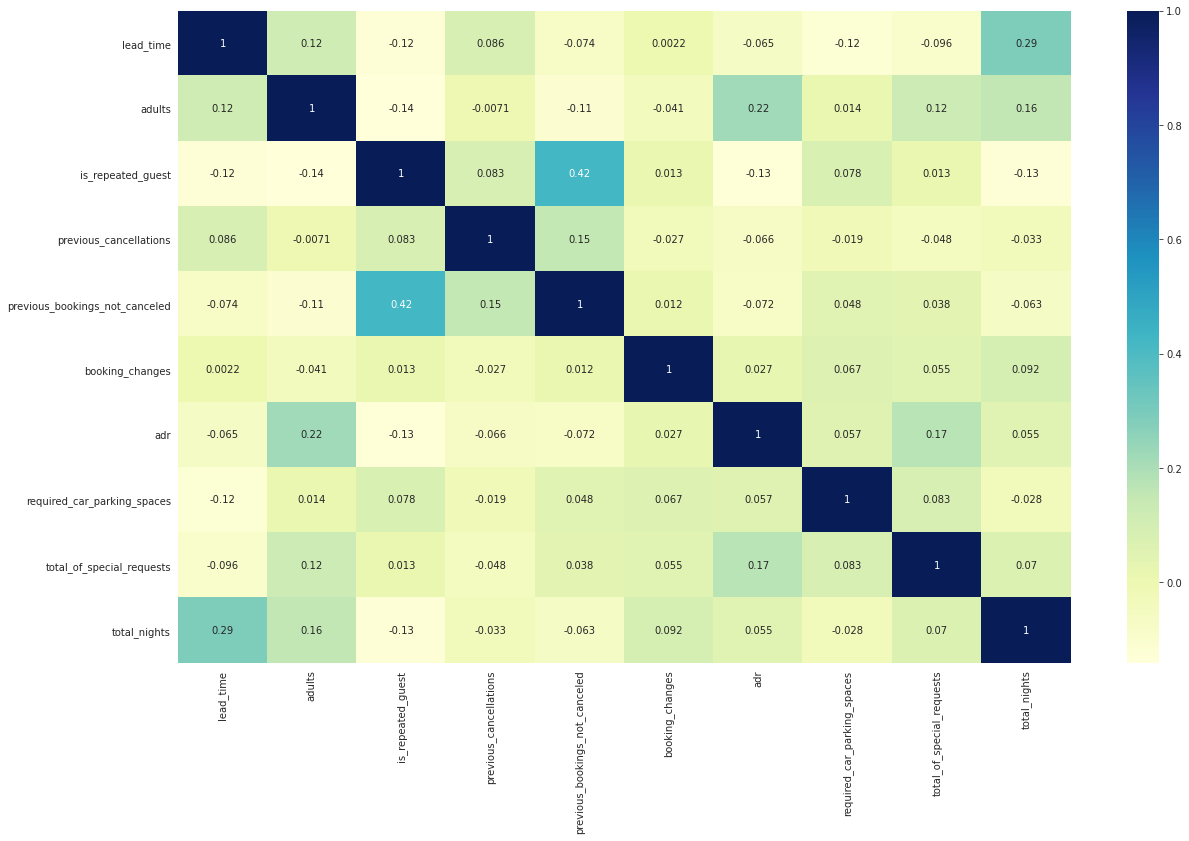

In [ ]:
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(corr_df, annot=True, ax=ax, cmap="YlGnBu")